In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import os
from random import shuffle

In [ ]:
TRAIN_DIR = "/content/train"
TEST_DIR = "/content/test"

In [ ]:
IMG_SIZE = 120
MODEL_NAME = 'NIKEvsADIDAS'

In [ ]:
def label_word(img):
  word_label = img.split('_')[0]
  if word_label == 'NIKE':
    return [1,0]
  elif word_label == 'ADIDAS':
    return [0,1]

In [ ]:
train_data = []
for img in tqdm(os.listdir(TRAIN_DIR)):
  label = label_word(img)
  path = os.path.join(TRAIN_DIR,img)

  # PIL

  img = Image.open(path)
  img = img.convert('L')
  img = img.resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)
  #create composite image by blending images using transperancy mask..
  # ANTIALIAS (a high-quality downsampling filter.)

  train_data.append([np.array(img), np.array(label)])

shuffle(train_data)

100%|██████████| 100/100 [00:00<00:00, 338.79it/s]


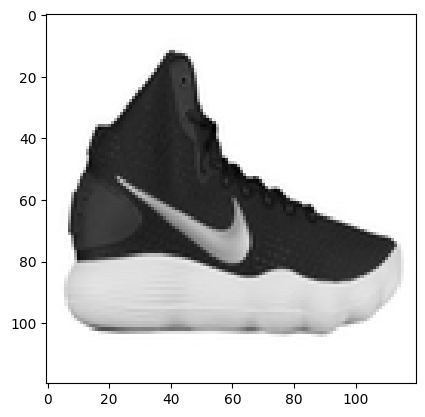

In [ ]:
plt.imshow(train_data[12][0], cmap = 'gist_gray')
plt.show()

In [ ]:
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(32,(5,5), activation='relu',input_shape=(120,120,1)))
model.add(Conv2D(32,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='relu'))  # adidas or nike two options so last has 2 neurons

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
x = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array([i[1] for i in train_data])
history = model.fit(x,y, epochs=10)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.4875 - loss: 8.2605
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5135 - loss: 7.8408
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5469 - loss: 7.3035
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.4948 - loss: 8.1430
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5146 - loss: 7.8240
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.4938 - loss: 8.1598
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4635 - loss: 8.6467
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.5260 - loss: 7.6393
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5042 - loss: 7.9919
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4948 - loss: 8.1430


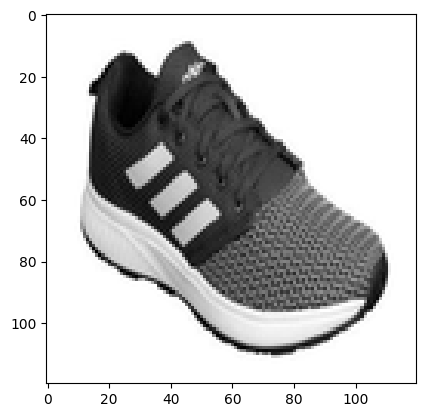

In [ ]:

img = Image.open("/content/Screenshot 2025-07-09 001051.png")
img = img.convert('L')
img = img.resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)
plt.imshow(np.array(img), cmap = 'gist_gray')
plt.show()

In [ ]:
model.predict(np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[    0.   , 21827.033]], dtype=float32)